## Example using Histone modification data downloaded from Encode

In [1]:
import pandas as pd
import numpy as np
from scivae import VAE

# Set the location of the mnist data
data_dir = '../tests/data/'
df = pd.read_csv('data/mouse_HM_var500_data.csv')
   

Using TensorFlow backend.


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
default_input (InputLayer)      (None, 4)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            15          default_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3)            12          dense_1[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            8           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## Normalise the data

Before running the VAE we might only want to do it on a subset, here I'm interested in marks at day E10.5 
only in the brain.

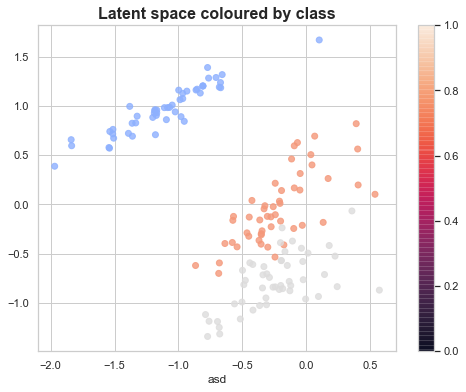

In [3]:
df = df.fillna(0)
# Get out columns with HM values
cols = [c for c in df.columns if '10' in c and 'brain' in c and 'signal' in c]  # i.e. only do brain at E10 samples
# Make sure we log2 the values since they're too diffuse
vae_df = pd.DataFrame()
vae_df['external_gene_name'] = df['external_gene_name'].values
new_cols = []
for c in cols:
    new_name = ' '.join(c.split('_')[:-3]).replace('embryonic', '')
    new_cols.append(new_name)
    vae_df[new_name] = np.log2(df[c] + 1)

dataset = vae_df[new_cols].values
# Create and train VAE

## Train the VAE

We run the training of the VAE 

In [4]:
vae = VAE(dataset, dataset, ["None"] * len(dataset), 'data/histone_config.json', f'vae_rcm', config_as_str=True)
vae.encode('default', epochs=10, batch_size=50, logging_dir=self.tmp_dir)

0.9736842105263158
0.9743589743589745


## Quality control!

Check that the nodes follow **approximately** a normal distribution.

In [ ]:
from scivae import Vis

vis = Vis(vae, vae.u, None)
vis.plot_node_hists(show_plt=True, save_fig=False)

## Quality control 2: Visualise the correlation between features.

Since the VAE isn't magic, just good at learning correlations/patterns between input features, it's sensible 
to check that the correlations between features and nodes exists.

In [ ]:
vis.plot_node_feature_correlation(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, save_fig=False)

## Having fun with inspecting the latent space

Now we are confident it's learnt stuff, let's look at how all our genes look on the latent space!

In [ ]:
vis.plot_feature_scatters(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, fig_type="png", save_fig=True,
                          title="latent space", output_dir='test_figures/')


## Plot specific genes

Since we love certain genes, lets have a look at where they are on the latent space

In [ ]:
cool_genes = [['Emx1', 'Eomes', 'Tbr1', 'Foxg1', 'Lhx6', 'Arx', 'Dlx1', 'Dlx2', 'Dlx5', 'Nr2e2', 'Otx2'],
              ['Hoxd8', 'Hoxd9', 'Hoxd10', 'Hoxd11', 'Hoxd12', 'Hoxd13', 'Hoxa7', 'Hoxa9', 'Hoxa10', 'Hoxa11',
              'Hoxa13',
              'Hoxb9', 'Hoxb13', 'Hoxc8', 'Hoxc9', 'Hoxc10', 'Hoxc11', 'Hoxc12', 'Hoxc13'],
              ['Ccna1', 'Ccna2', 'Ccnd1', 'Ccnd2', 'Ccnd3', 'Ccne1', 'Ccne2', 'Cdc25a',
               'Cdc25b', 'Cdc25c', 'E2f1', 'E2f2', 'E2f3', 'Mcm10', 'Mcm5', 'Mcm3', 'Mcm2', 'Cip2a']
              ]

vis.plot_values_on_scatters(vae_df, "external_gene_name", ['Forebrain', 'Spinal cord', 'Pro. Prolif.'],
                            cool_genes, show_plt=True, fig_type=".png",
                            save_fig=False)
        

vis.plot_feature_scatters(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, fig_type="png", save_fig=True,
                          title="latent space", output_dir='test_figures/')

vis.plot_node_feature_correlation(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, save_fig=False)

vis.plot_feature_scatters(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, fig_type="png", save_fig=True,
                          title="latent space", output_dir='test_figures/')

In [ ]:
vis.plot_node_feature_correlation(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, save_fig=False)

vis.plot_feature_scatters(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, fig_type="png", save_fig=True,
                          title="latent space", output_dir='test_figures/')

In [ ]:
vis.plot_node_feature_correlation(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, save_fig=False)

vis.plot_feature_scatters(vae_df, 'external_gene_name', columns=new_cols, show_plt=True, fig_type="png", save_fig=True,
                          title="latent space", output_dir='test_figures/')